# Байесовская Статистика. Методы Монте Карло по схеме марковской цепи

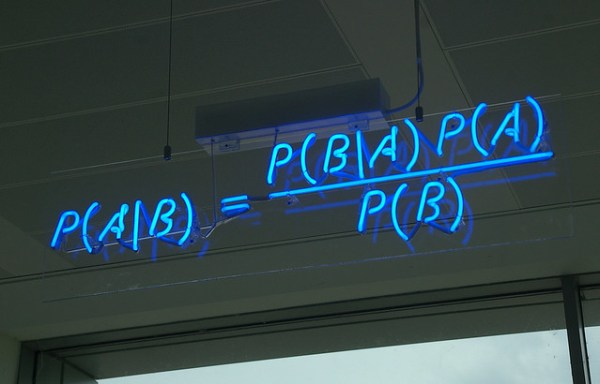

Априорная или безусловная вероятность, связанная с некоторым случайным событием 
A
, представляет собой степень уверенности в том, что данное событие произошло, в отсутствие любой другой информации, связанной с этим событием. Ее знание необходимо для вычисления апостериорных вероятностей в простом классификаторе Байеса.

на примере формулы Байеса:

B - рассматриваемое событие, а 
A - гипотеза, входящая в некую полную группу событий.

В ней вероятность 
P
(
A
)
 называется безусловной, или априорной вероятностью, а вероятность 
P
(
B
|
A) - условной или апостериорной вероятностью. Как можно заметить, априорная вероятность высчитывается непосредственно до наблюдений, а апостериорная - после, уже с учетом полученных апостериорных данных.

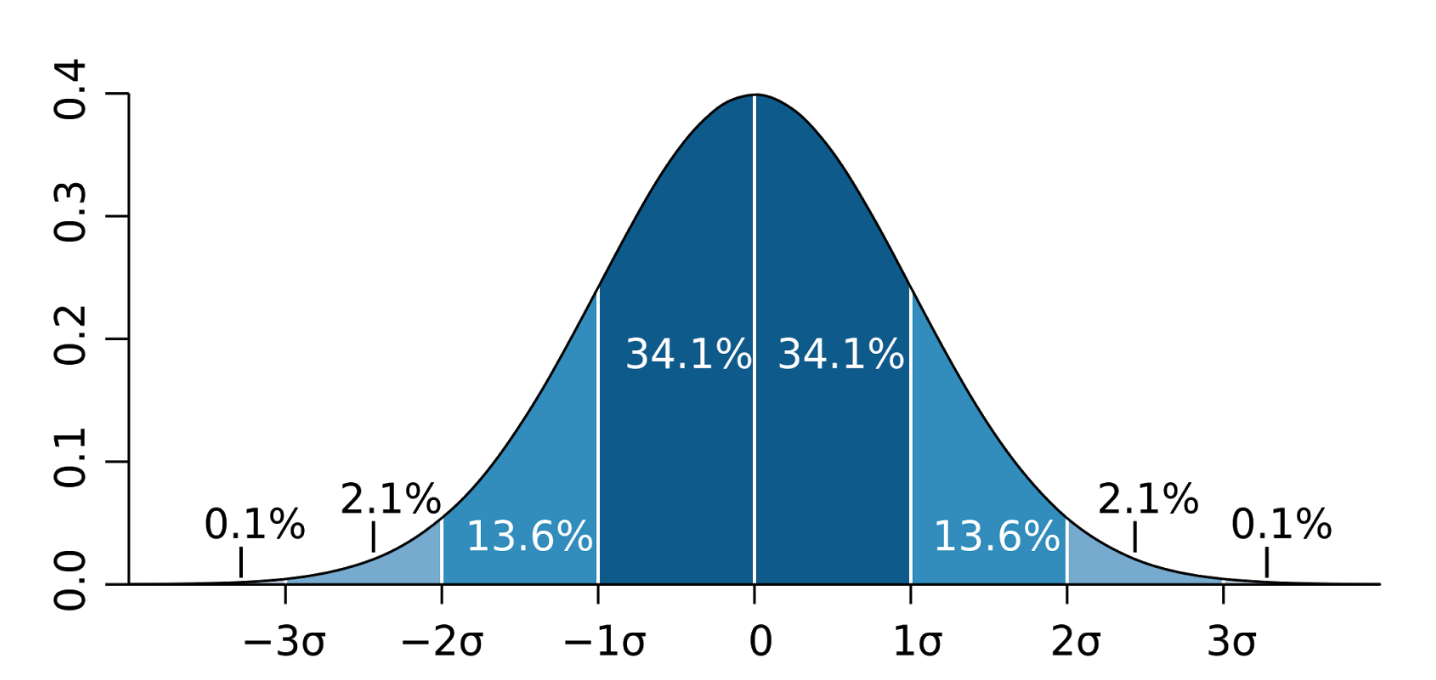

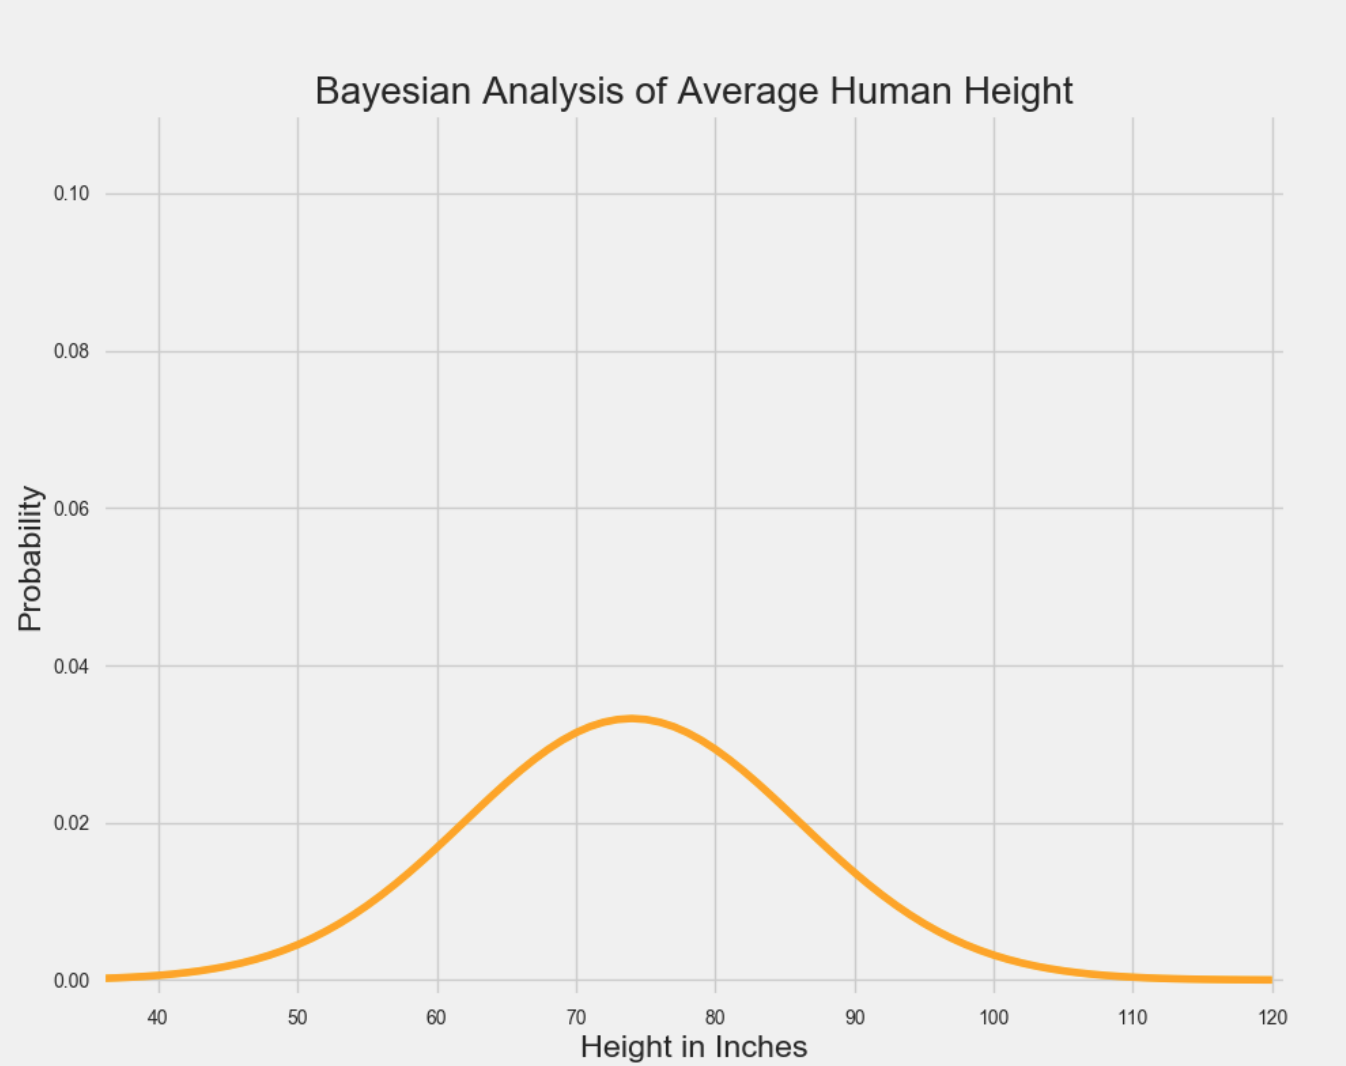

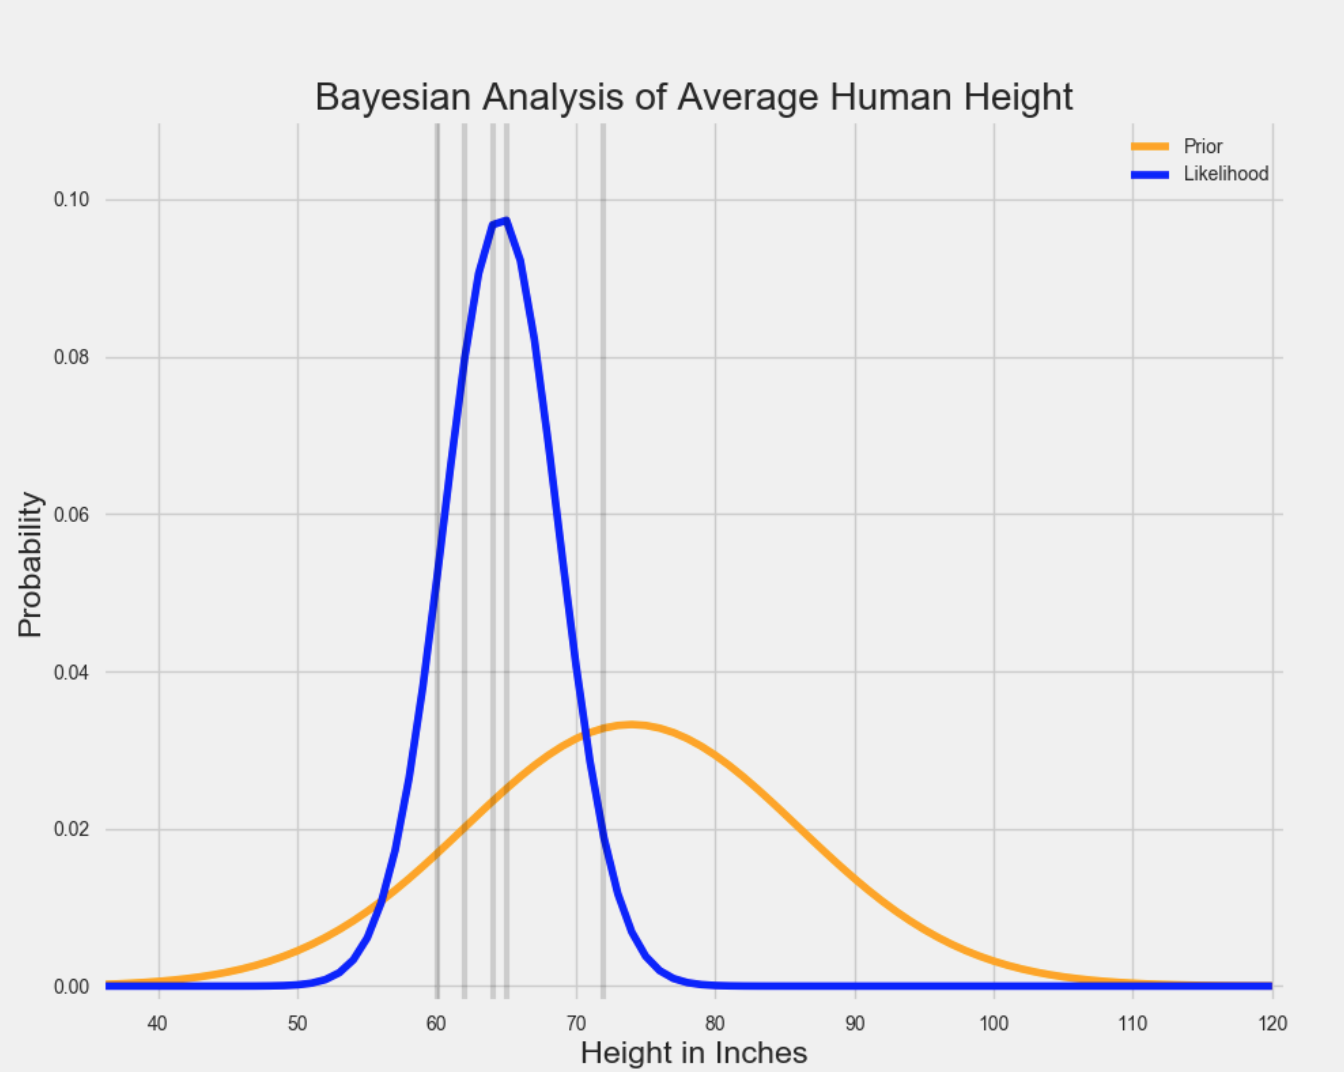

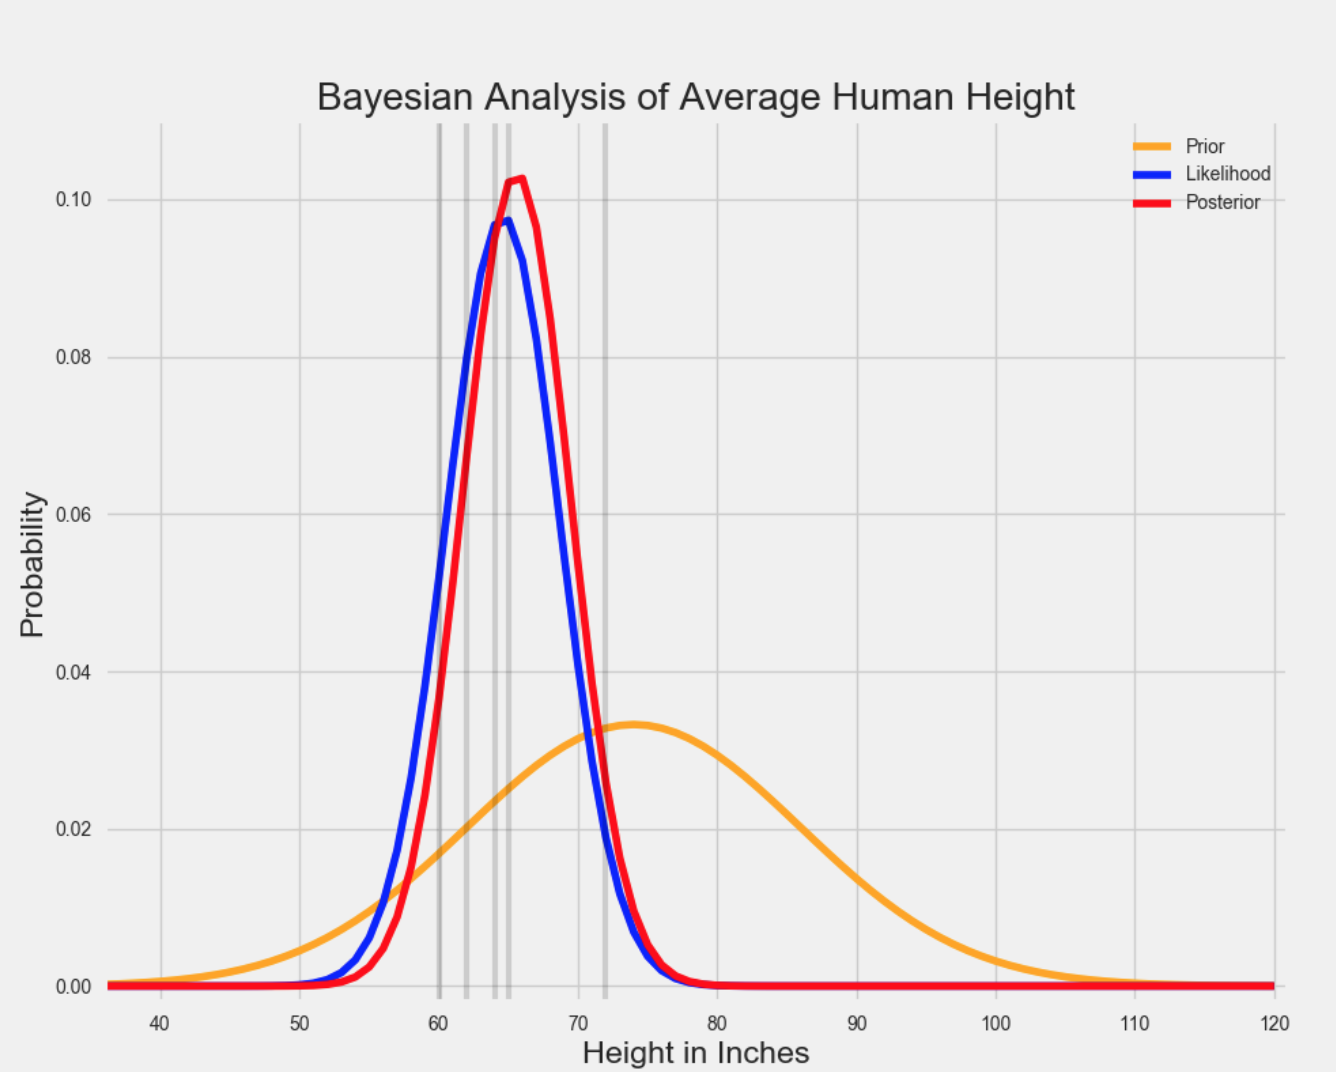

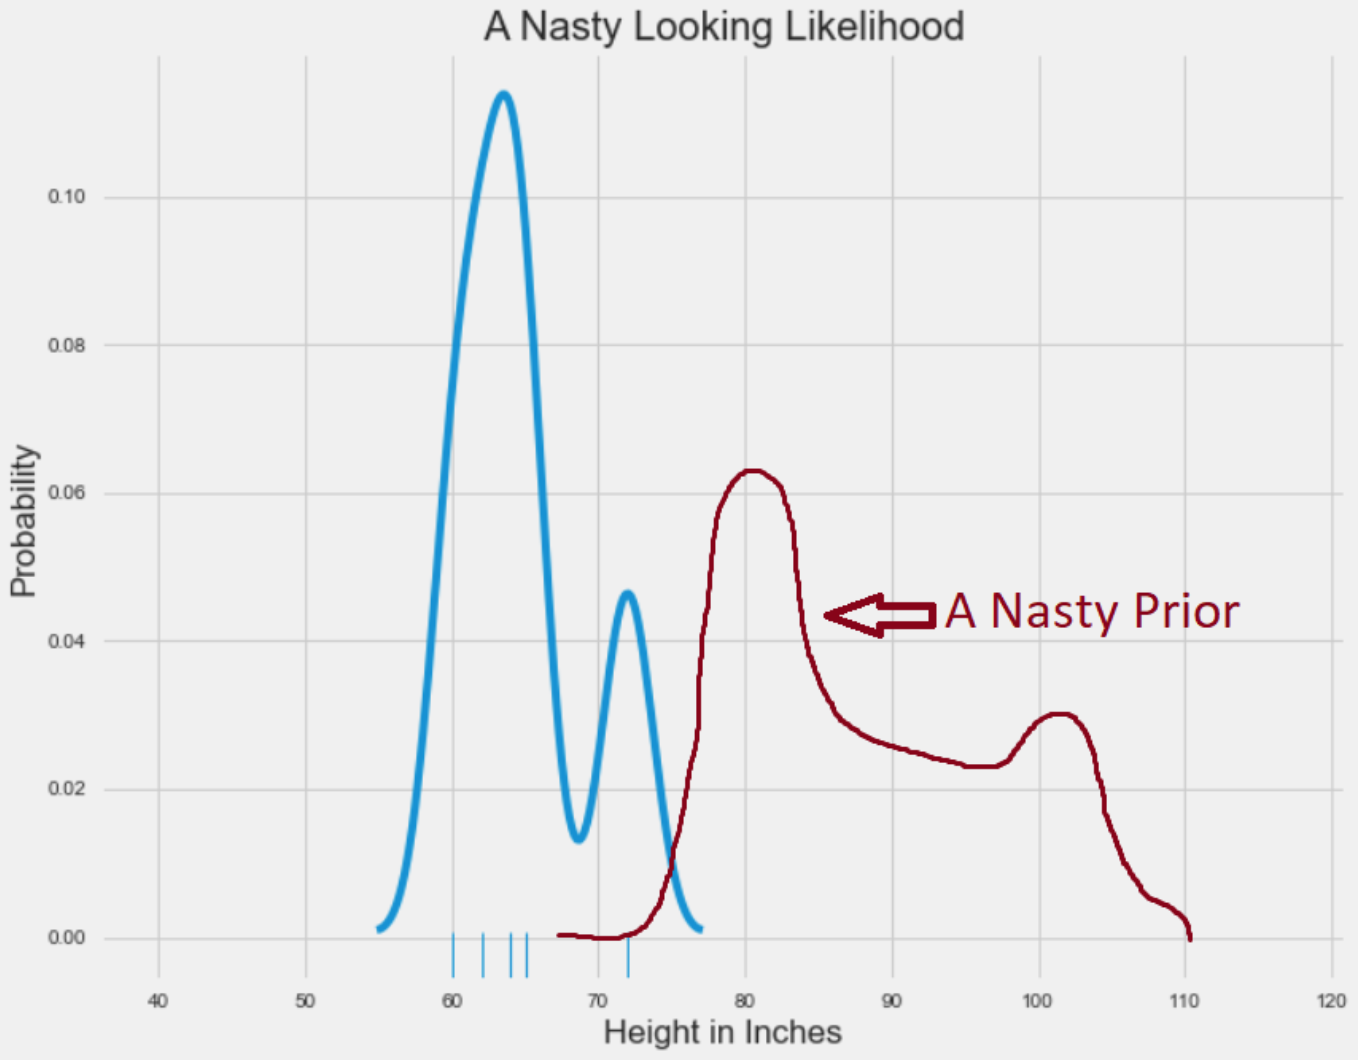

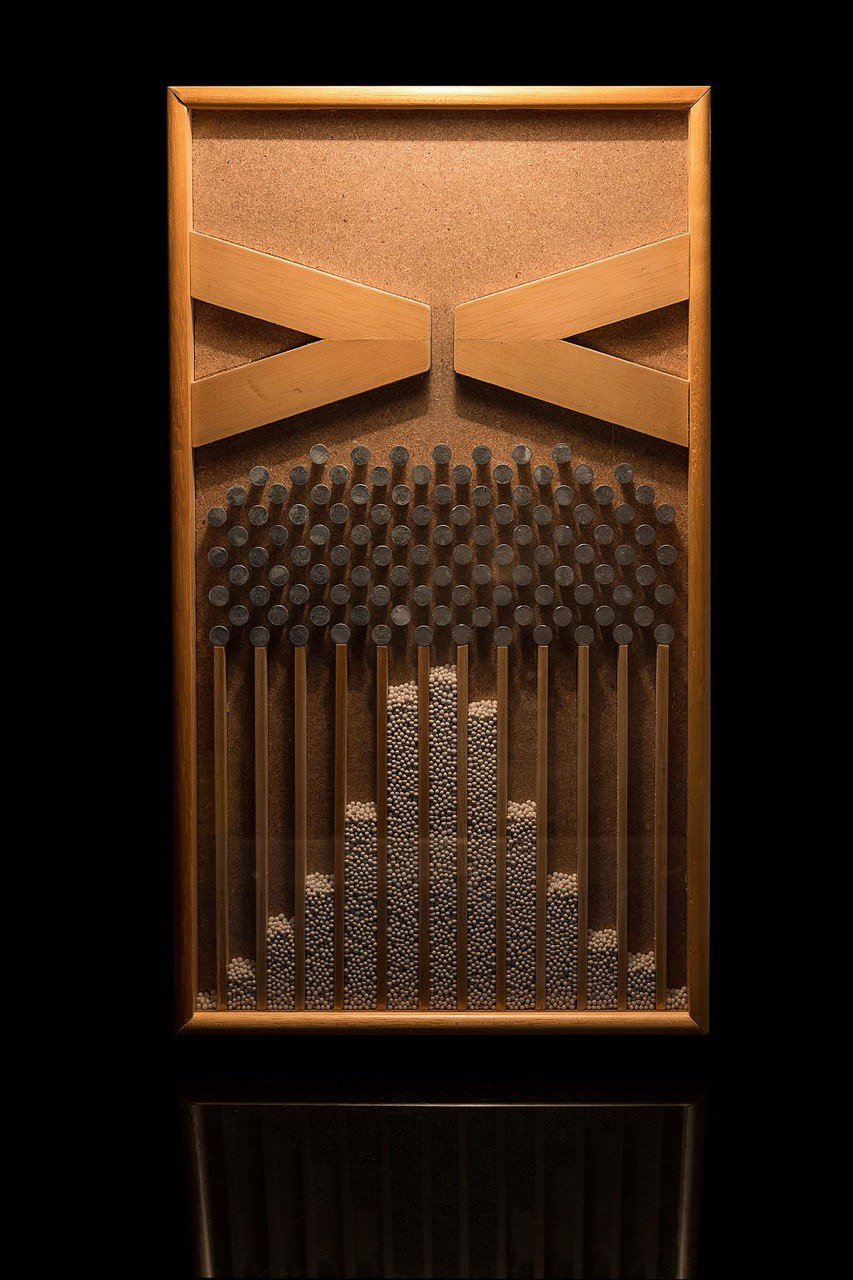

https://www.sciencealert.com/coloured-balls-sorted-machine-quantum-resonance-fake-computer-simulation-galton-board

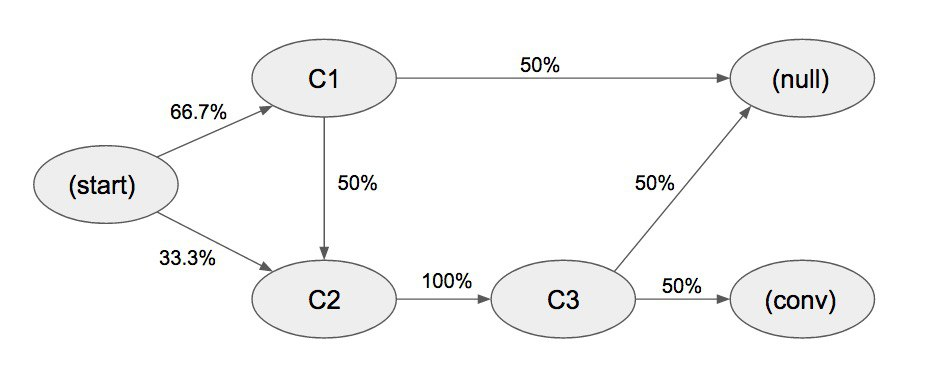

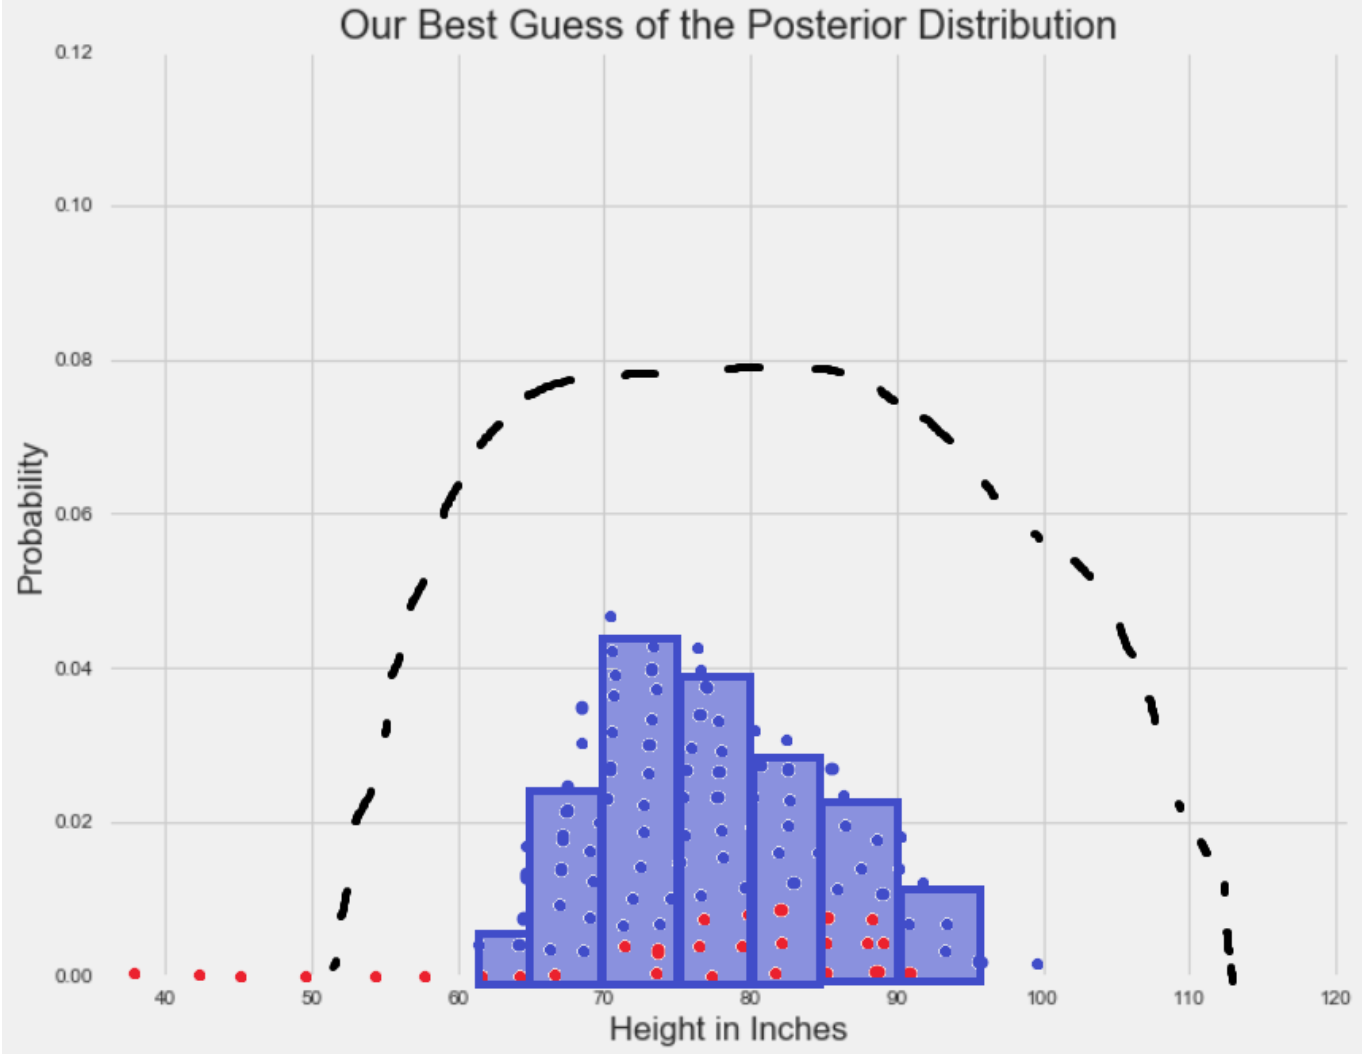

In [45]:
import numpy 
from numpy import polyfit
from matplotlib.pyplot import figure, plot, show, legend
import pymc

In [46]:
#Генерация данных с шумом
number_points     = 20
true_coefficients = [10.4, 5.5]
x                 = numpy.linspace(0, 10, number_points)
noise             = numpy.random.normal(size = number_points)
data              = true_coefficients[0]*x + true_coefficients[1] + noise

In [60]:
sigma = pymc.Uniform('sigma', 0., 100.)
a     = pymc.Uniform('a', 0., 20.)
b     = pymc.Uniform('b', 0., 20.)

In [61]:
@pymc.deterministic(plot=False)
def linear_fit(a=a, b=b, x=x):
      return a*x + b

In [49]:
y = pymc.Normal('y', mu=linear_fit, tau=1.0/sigma**2, value=data, observed=True)

In [80]:
D = pymc.MCMC(y, db = 'pickle')
D.sample(iter = 1000000, burn = 1000)

 [-----------------100%-----------------] 10000 of 10000 complete in 0.1 sec

In [76]:
chisq_result = polyfit(x, data, 1)

In [77]:
print (chisq_result[0], chisq_result[1])
print (true_coefficients[0],true_coefficients[1])

10.4390470928625 5.099863941736021
10.4 5.5


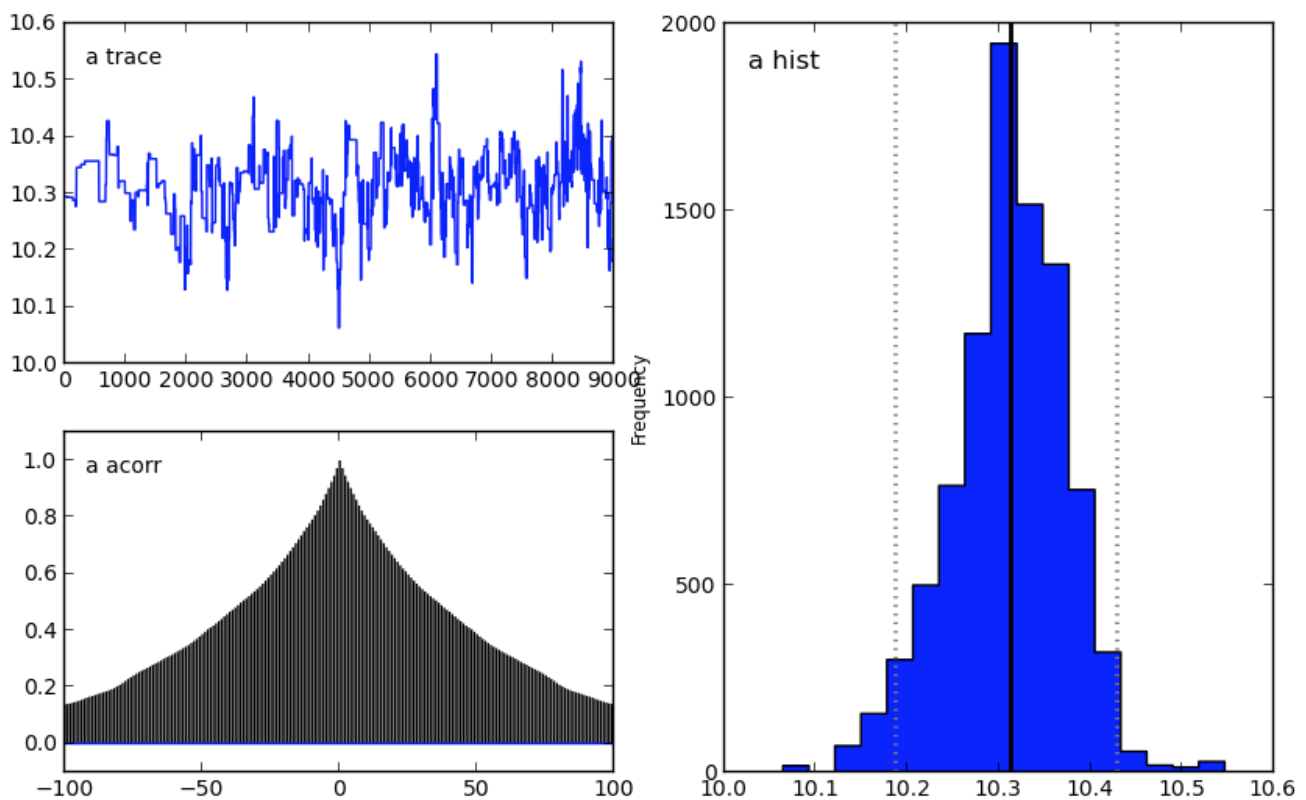

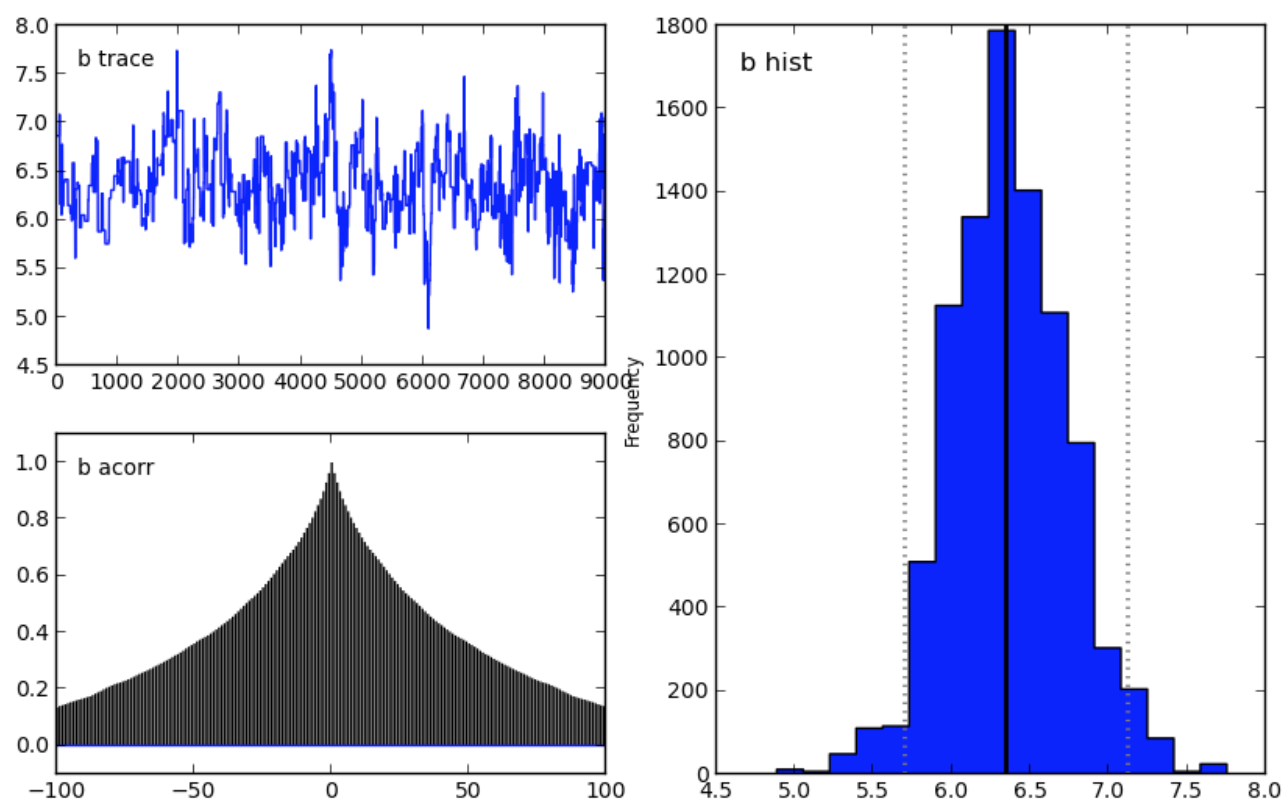

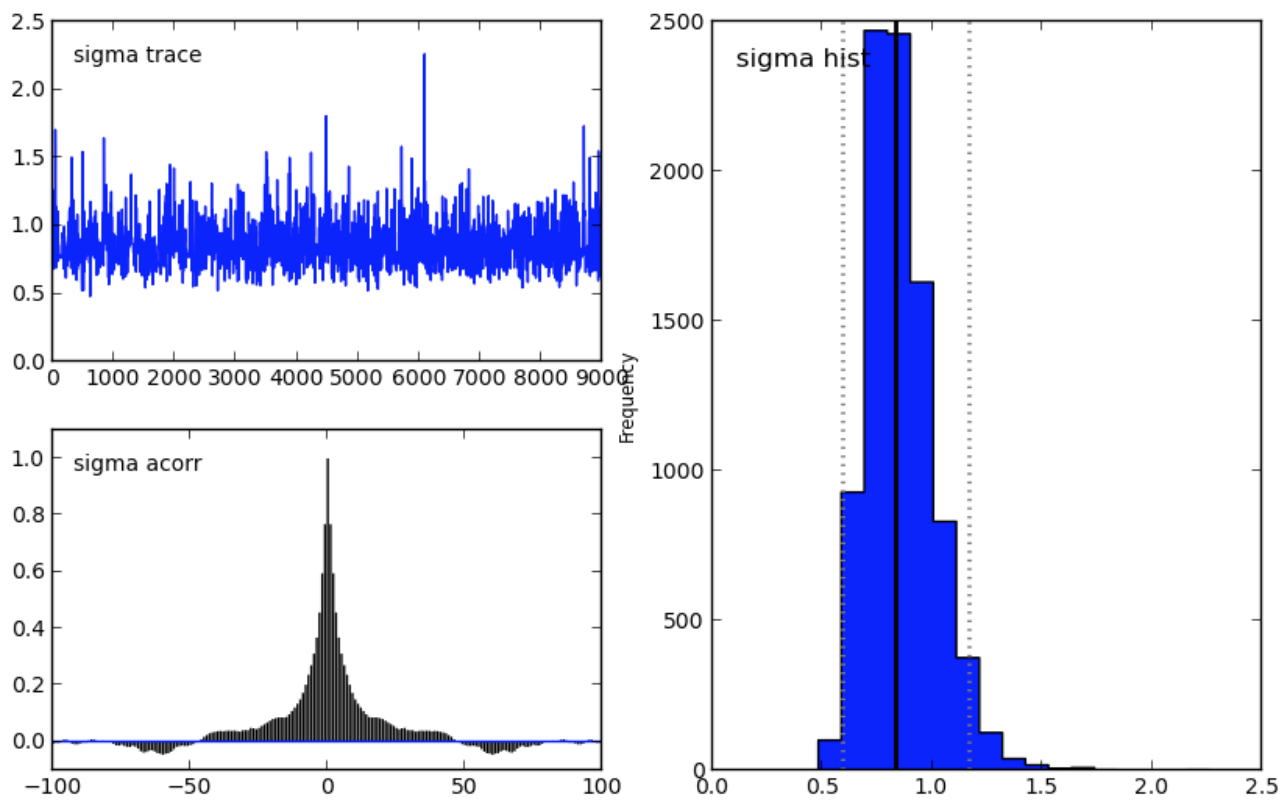